# Customer Segmentation Using Unsupervised Learning

# Introduction

Customer segmentation is a crucial technique in marketing analytics, enabling businesses to tailor their strategies to distinct groups based on their behavior and demographics. This notebook uses unsupervised learning to segment customers from a mall dataset, focusing on income and spending patterns. We employ scaling for data normalization, clustering algorithms for segmentation, and visualizations for interpretability.

## Objectives

* Load and explore the Mall Customers dataset.
* Perform feature scaling and visual exploration to identify potential groupings.
* Apply K-Means clustering and utilize methods such as the Elbow and Silhouette Scores to determine the optimal number of clusters.
* Visualize clusters in 2D plots for intuitive understanding.
* Experiment with DBSCAN as an alternative density-based clustering method.
* Analyze average spending and income per cluster to derive business insights.


## Tools & Libraries

* Programming Language: Python 3.x
* Data Manipulation: Pandas
* Visualization: Matplotlib, Seaborn
* Machine Learning: Scikit-learn (for scaling, K-Means, DBSCAN, and metrics)
* Environment: Kaggle Notebook (with pre-installed libraries)


## Dataset Overview

The dataset is sourced from Kaggle: Customer Segmentation Tutorial in Python. It contains 200 records with features including:

* CustomerID: Unique identifier.
* Gender: Categorical (Male/Female).
* Age: Numerical (18-70).
* Annual Income (k$): Numerical (15-137).
* Spending Score (1-100): Numerical (1-99).

We primarily use 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering, as they capture economic and behavioral aspects.

## Requirements and Versions
This lists installed packages for reproducibility

* Python: 3.x
* pandas: 1.5+
* scikit-learn: 1.2+
* matplotlib: 3.7+
* seaborn: 0.12+

# Import Libraries
We import essential libraries at the outset for data handling, visualization, and clustering.

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Set visualization style for consistency
sns.set(style='whitegrid')

# Data Loading and Exploration
Load the dataset and conduct initial checks for structure, missing values, and summary statistics.

In [2]:
data_path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'
df = pd.read_csv(data_path)

print(df.isnull().sum()) 
print(df.dtypes)  
print(f"Duplicates: {df.duplicated().sum()}") 

print("Dataset Information:")
display(df.info())

print("\nFirst 5 Rows:")
display(df.head())

print("\nStatistical Summary:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Duplicates: 0
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None


First 5 Rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Missing Values:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Preprocessing
Select relevant features and apply standard scaling to ensure equal contribution during clustering.

In [3]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nScaled Data Summary:")
display(X_scaled_df.describe().round(2))


Scaled Data Summary:


,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


# Exploratory Data Analysis (EDA)
Visualize the data to uncover patterns and potential clusters.

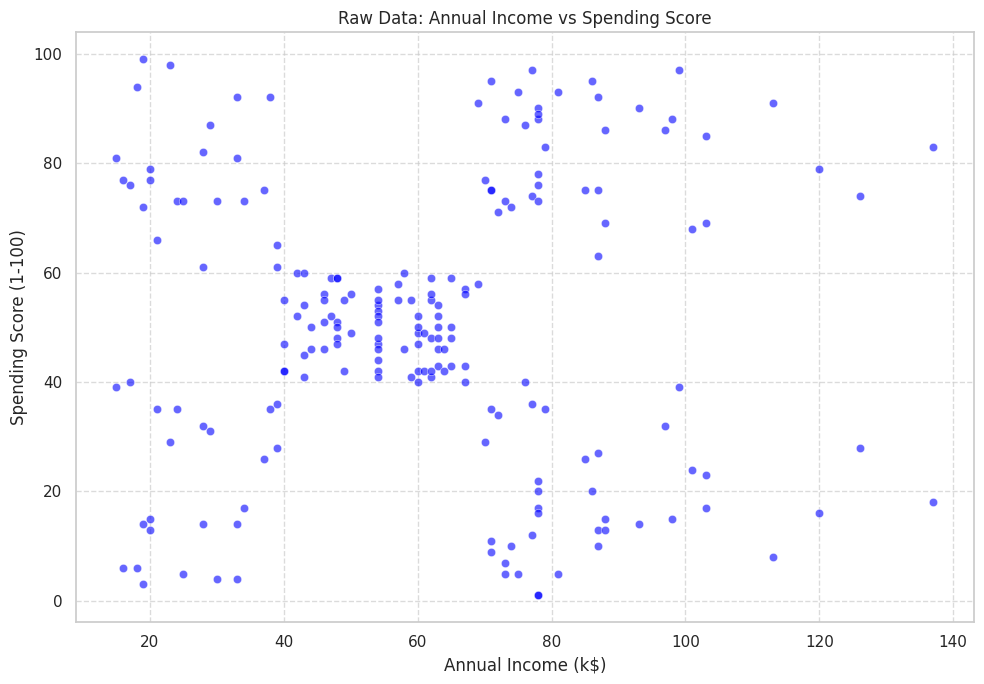

<Figure size 1200x800 with 0 Axes>

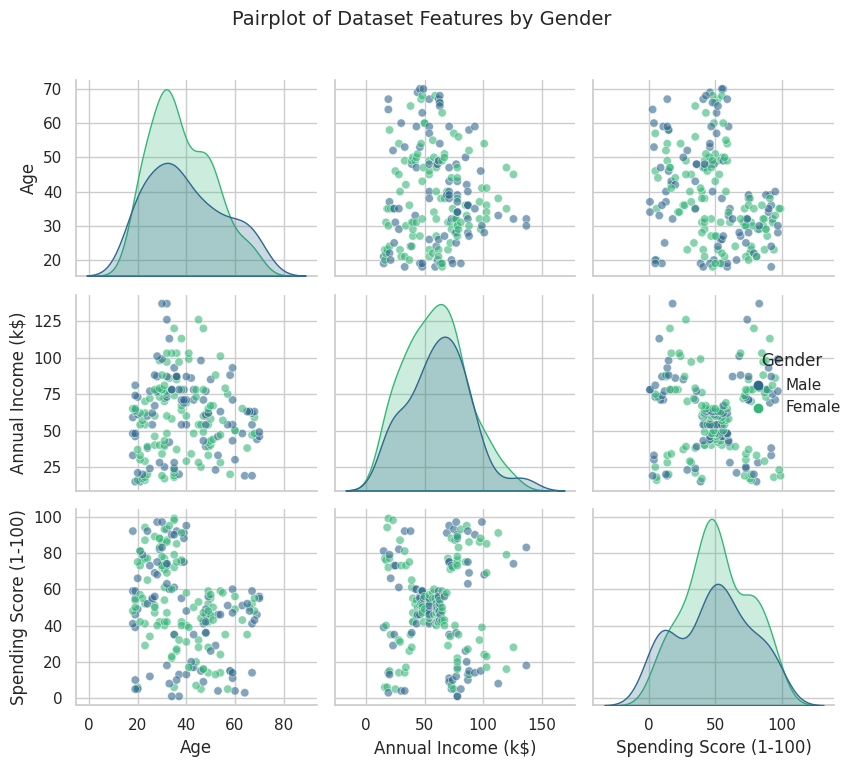

In [5]:
warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/plots'
os.makedirs(output_dir, exist_ok=True)

# Scatter plot of raw data
plt.figure(figsize=(10, 7))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Raw Data: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scatter_income_vs_spending.png'), dpi=300, bbox_inches='tight')
plt.show()  

# Pairplot including other variables for broader insights
plt.figure(figsize=(12, 8))
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', palette='viridis', 
             plot_kws={'alpha': 0.6, 'edgecolor': 'w', 'linewidth': 0.5})
plt.suptitle('Pairplot of Dataset Features by Gender', y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'pairplot_features_by_gender.png'), dpi=300, bbox_inches='tight')
plt.show()  

# Determine Optimal Number of Clusters
Use the Elbow Method (WCSS) and Silhouette Score to identify the ideal K for K-Means.

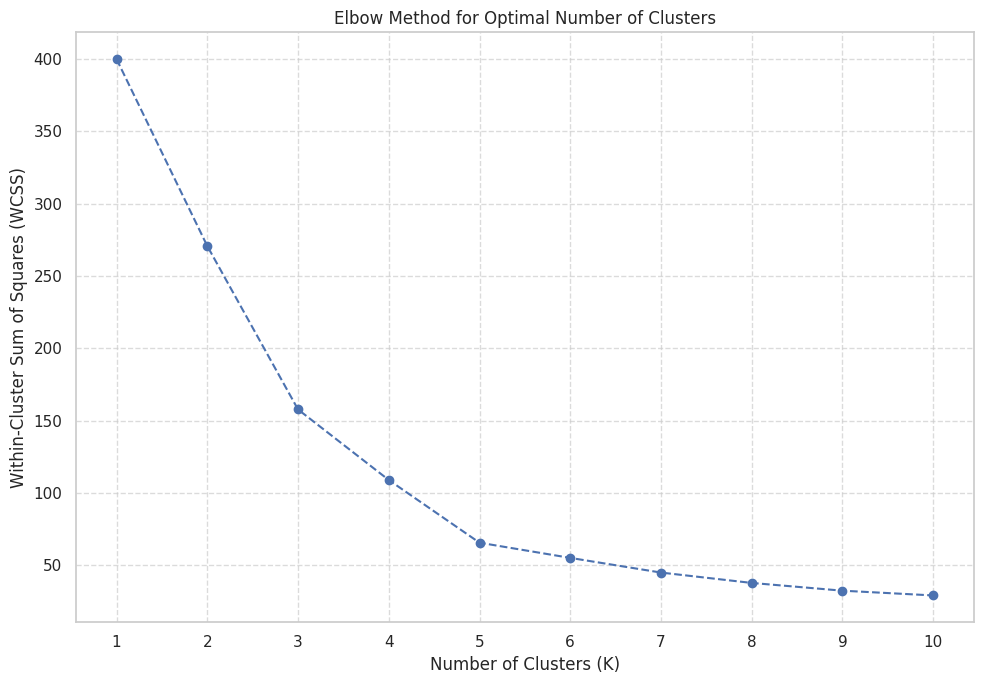

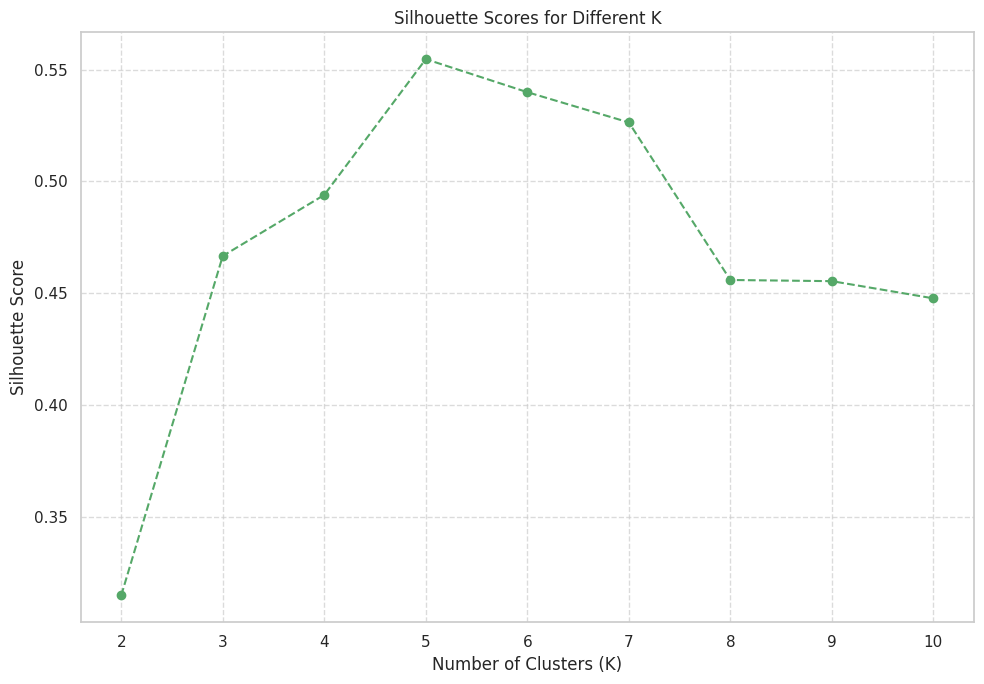

In [6]:
k_range = range(1, 11)

# Compute WCSS for Elbow Method
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 7))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(list(k_range))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'elbow_method_wcss.png'), dpi=300, bbox_inches='tight')
plt.show()

# Compute Silhouette Scores (for K=2 to 10)
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'silhouette_scores.png'), dpi=300, bbox_inches='tight')
plt.show()


# Apply K-Means Clustering
Fit the model with the optimal K and visualize the clusters.

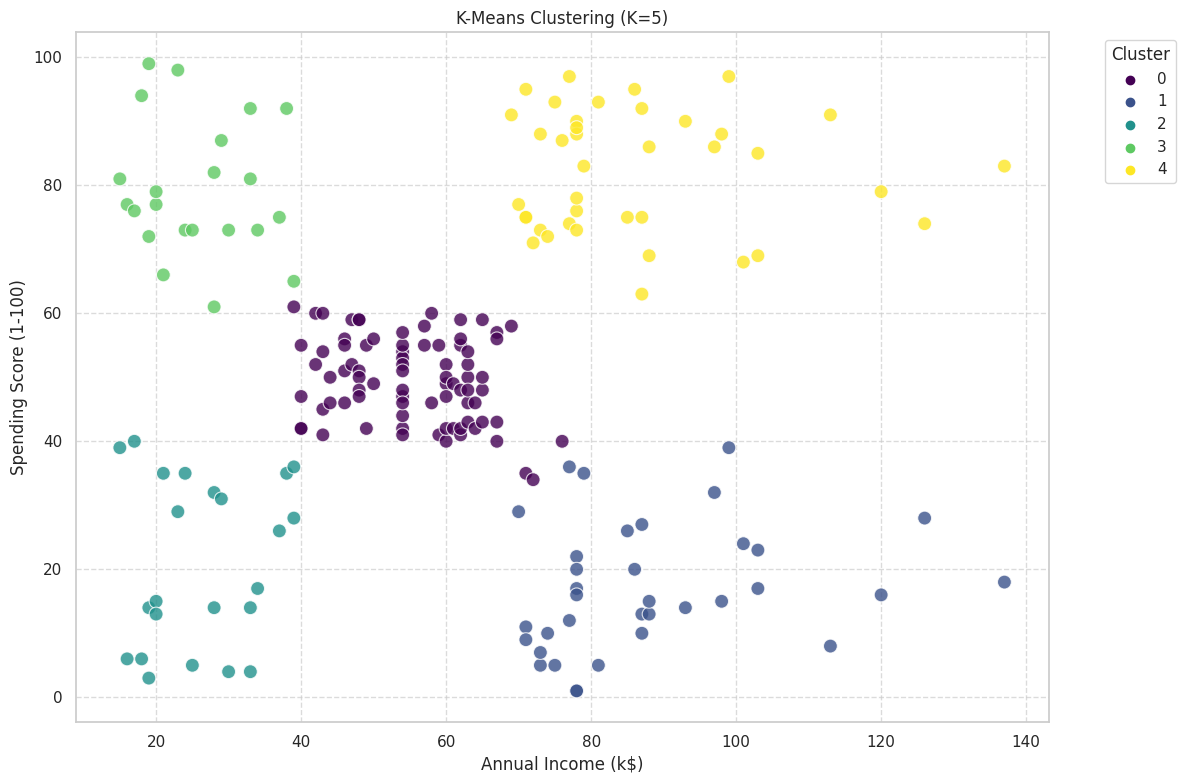

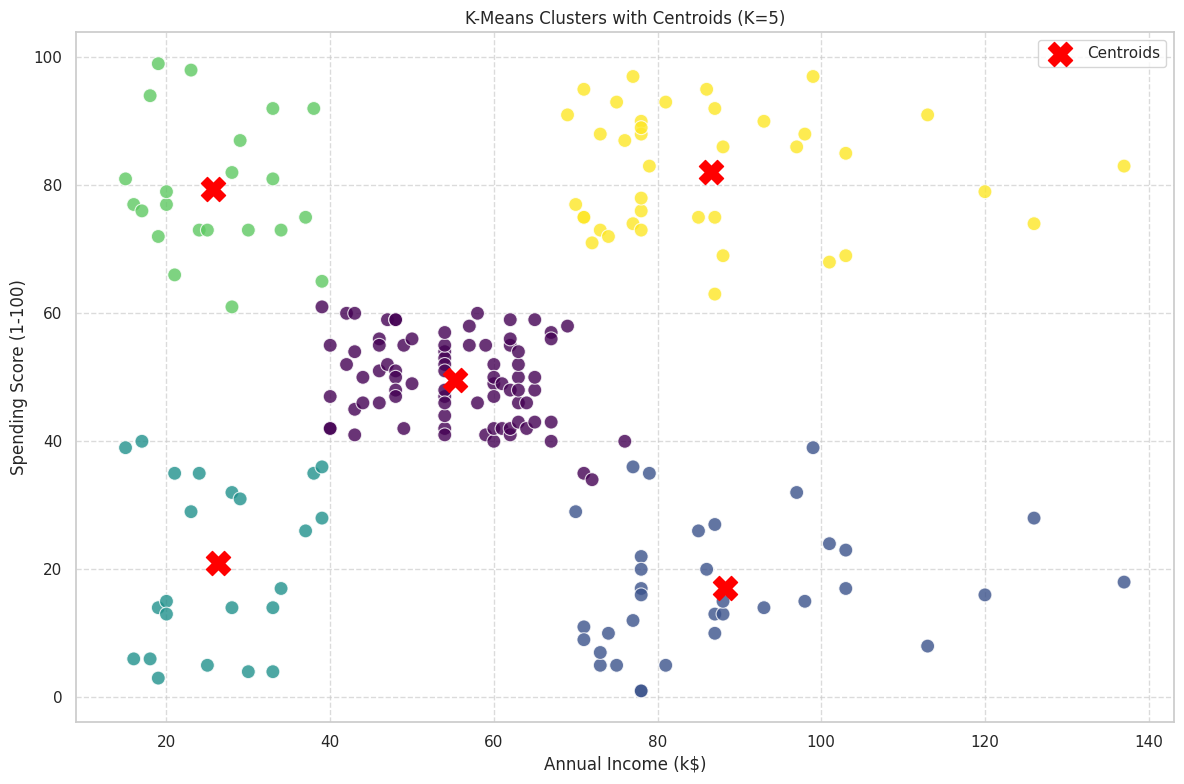

In [7]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, 
                palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'kmeans_clustering.png'), dpi=300, bbox_inches='tight')
plt.show()

# Overlay centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, 
                palette='viridis', s=100, alpha=0.8, legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clusters with Centroids (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'kmeans_clusters_with_centroids.png'), dpi=300, bbox_inches='tight')
plt.show()

# Apply DBSCAN Clustering
Explore DBSCAN as a density-based alternative, which handles noise and irregular shapes.

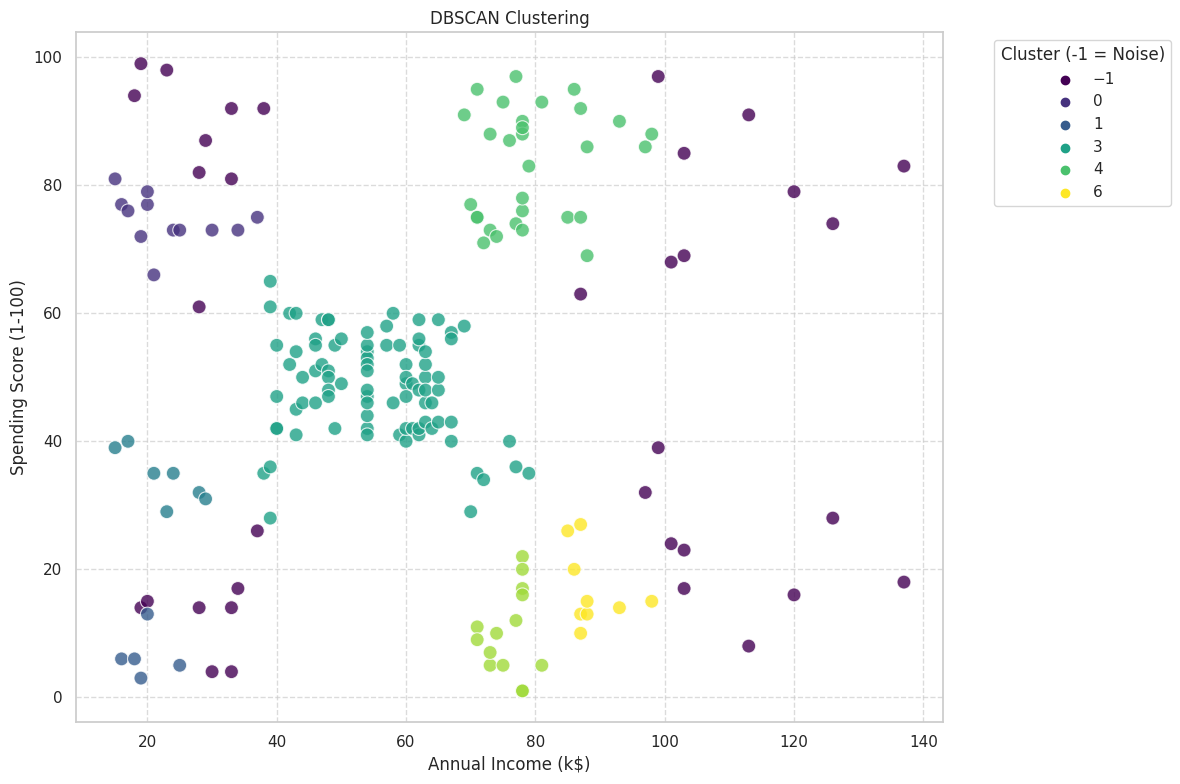

Number of DBSCAN Clusters: 7


In [8]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters 
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, 
                palette='viridis', s=100, alpha=0.8)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster (-1 = Noise)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'dbscan_clustering.png'), dpi=300, bbox_inches='tight')
plt.show()

# Count clusters (excluding noise)
n_clusters_db = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].unique() else 0)
print(f"Number of DBSCAN Clusters: {n_clusters_db}")

# Analyze Cluster Characteristics
Summarize averages per cluster and visualize for insights.


Average Income and Spending per K-Means Cluster:


,Annual Income (k$),Spending Score (1-100)
Cluster,,
1,88.20,17.11
2,26.30,20.91
0,55.30,49.52
3,25.73,79.36
4,86.54,82.13


<Figure size 1200x800 with 0 Axes>

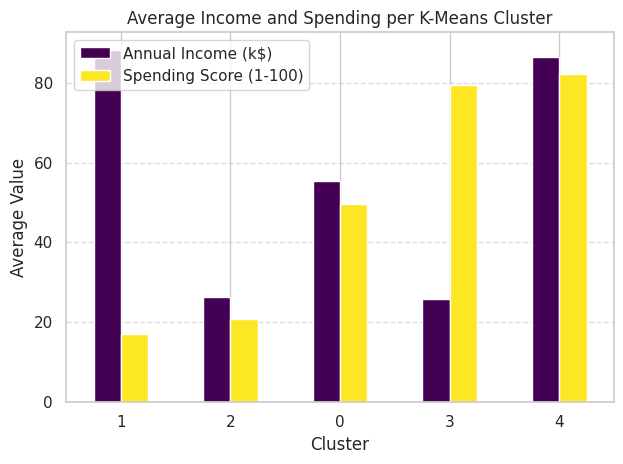


Average Income and Spending per DBSCAN Cluster:


,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,
0,23.17,74.58
1,19.60,6.60
2,22.43,34.43
3,55.23,48.58
4,79.53,83.13
5,75.93,10.07
6,88.78,17.00


In [9]:
# K-Means cluster summary
cluster_summary = df.groupby('Cluster')[features].mean().sort_values('Spending Score (1-100)').round(2)
print("\nAverage Income and Spending per K-Means Cluster:")
display(cluster_summary)

# Bar plot for K-Means 
plt.figure(figsize=(12, 8))
cluster_summary.plot(kind='bar', colormap='viridis')
plt.title('Average Income and Spending per K-Means Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'kmeans_cluster_summary_bar.png'), dpi=300, bbox_inches='tight')
plt.show()

# DBSCAN cluster summary (exclude noise)
db_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[features].mean().round(2)
print("\nAverage Income and Spending per DBSCAN Cluster:")
display(db_summary)

# Conclusion and Insights

This notebook successfully segmented customers into 5 distinct groups using K-Means, validated by metrics and visualizations. DBSCAN provided a robust alternative, identifying similar patterns with outlier detection. These segments can inform marketing: e.g., promotions for low-spenders or loyalty programs for high-value customers.
Limitations: Analysis is limited to two features; incorporating Age or Gender could enhance granularity.

Future Work: Experiment with hierarchical clustering or deploy segments in a recommendation system.